# Подключение библиотек

In [1]:
using PyCall
np = pyimport("numpy")
using DifferentialEquations
using DynamicalSystems
using PyPlot
using DiffEqCallbacks
using ForwardDiff
using Latexify, LaTeXStrings, SymEngine
using LinearAlgebra
using JLD

In [20]:
include("Utils\\Computation_Utils.jl")
#include("Utils\\CallBack_Utils.jl")
#include("Utils\\YAML_Utils.jl")
#include("Utils\\Graphics_Utils.jl")
include("ODEs\\BS_Uni_System.jl")
include("Utils\\PeriodSync_Utils.jl")

Main.PeriodSync_Utils

In [3]:
pushfirst!(PyVector(pyimport("sys")."path"), "")
MU = pyimport("Utils.Matplotlib_Utils")

PyObject <module 'Utils.Matplotlib_Utils' from 'c:\\Users\\artyo\\YandexDisk\\Other\\Julia\\BS_module\\Utils\\Matplotlib_Utils.py'>

In [4]:
CoupleFuncNum = 2

if CoupleFuncNum == 1
    
    function MyCoupleFunc(x)
        return 1/(1 + exp(10*(cos(x))))
    end
    CoupleFuncName = "1_(1 + exp(10(cos(x))))"
     
elseif CoupleFuncNum == 2
    
    function MyCoupleFunc(x)
        return -cos(x)
    end

    CoupleFuncName = "-cos(x)"
    
elseif CoupleFuncNum == 3
    
    function MyCoupleFunc(x)
        return 1-cos(x)
    end

    CoupleFuncName = "1-cos(x)"
    
end

"-cos(x)"

In [5]:
a2 = pi/2
a4 = 3.24685581148453
K = 1.5789473684210527
r = K/4

Eps = 1e-5

config = Dict("a2" => a2, "a4" => a4, "K" => K, "r" => r, "Eps" => Eps)
ODESystem = BS_Uni_Sys.Get_Uni_Sys(config, MyCoupleFunc)

#IC = [pi - 0.2, 0.2, 0.4, pi - 0.2, 0.4, 0.2]
IC = [pi - 0.2, 0.2, 0.4, pi - 0.2 + pi, 0.4 + pi, 0.2 + pi]

6-element Vector{Float64}:
 2.941592653589793
 0.2
 0.4
 6.083185307179586
 3.541592653589793
 3.3415926535897933

In [31]:
time_span = 150.0
trans_time = 100.0

alg = DP8()

dt = 1e-3
abstol = 1e-13
reltol = 1e-13
maxiters = 1e10

ODEKwargs = Dict(:abstol => abstol, :reltol => reltol, :maxiters => maxiters, :dt => dt)
diffeq = Dict(:alg => alg, :abstol => abstol, :reltol => reltol, :maxiters => maxiters, :dt => dt)

Dict{Symbol, Any} with 5 entries:
  :maxiters => 1.0e10
  :alg      => DP8()
  :reltol   => 1.0e-13
  :abstol   => 1.0e-13
  :dt       => 0.001

# Наблюдаем периодическую траекторию в 6D системе

In [32]:
sol = Computation_Utils.SolveODE(ODESystem, IC, time_span; alg = alg,
                                                     trans_time = trans_time,
                                                     kwargs = ODEKwargs);

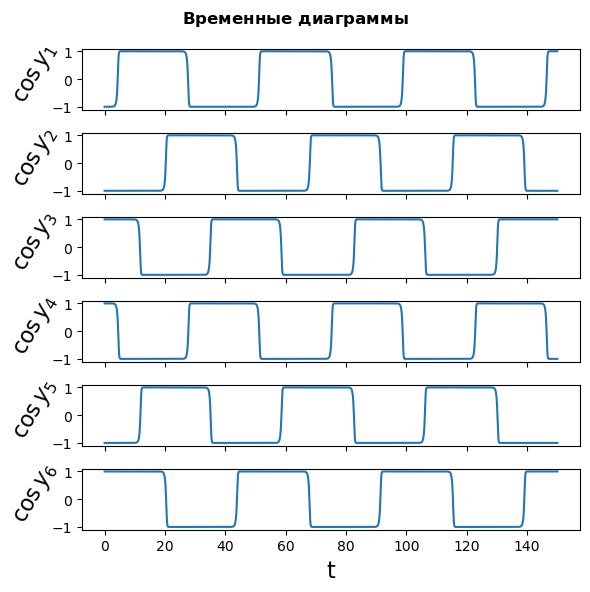

In [33]:
MU.plotTimeSeries(sol, projFunc = MU.projCos)

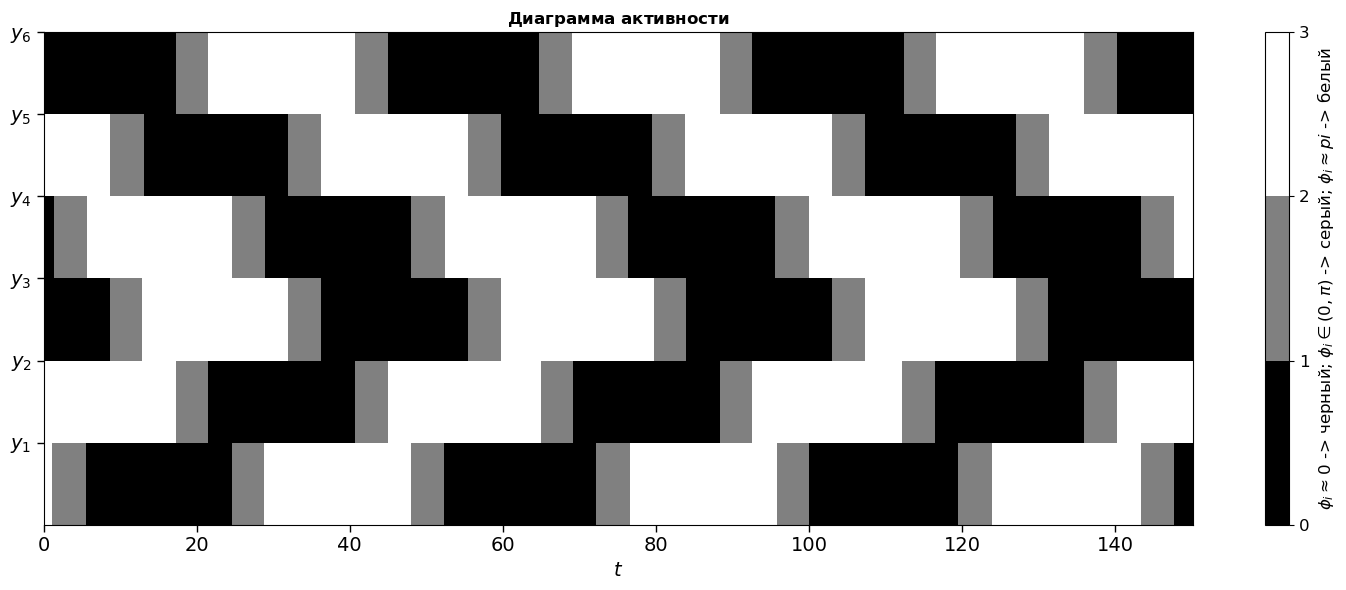

In [34]:
MU.plotActivationDiagram(sol)

# Определяем синхронизованные переменные, их смещения фаз относительно друг друга, а так же время периода

In [35]:
syncWith = PeriodSync_Utils.getSync(sol)

Dict{Any, Any} with 3 entries:
  "phi2" => Dict{String, Real}("psi"=>3, "delay"=>π, "std"=>0.0523068)
  "phi3" => Dict{String, Real}("psi"=>2, "delay"=>π, "std"=>0.0687379)
  "phi1" => Dict{String, Real}("psi"=>1, "delay"=>π, "std"=>0.0671989)

In [36]:
periodTime = PeriodSync_Utils.getPeriodTime(sol)

46.81095521805193

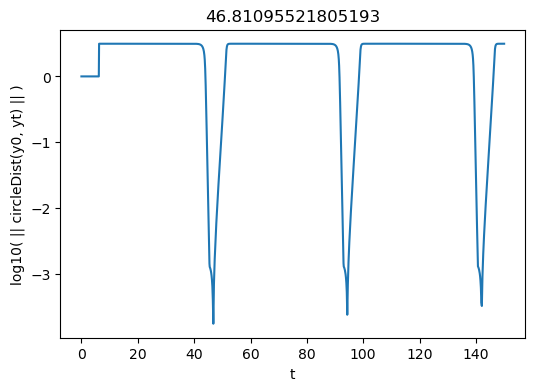

In [37]:
PeriodSync_Utils.plotNorms(sol)

# Сравнение поведения редуцированной 3D системы

In [38]:
RedSys = BS_Uni_Sys.Get_Reduced_Sys(config, MyCoupleFunc, syncWith)
u0 = [p[1] % (2*pi) for p in sol.y[1:3]]

3-element Vector{Float64}:
  3.1430425973830154
  3.1415889583375556
 -6.227241962086794e-6

In [39]:
RedSysSol = Computation_Utils.SolveODE(RedSys, u0, time_span; alg = alg,
                                                     kwargs = ODEKwargs);

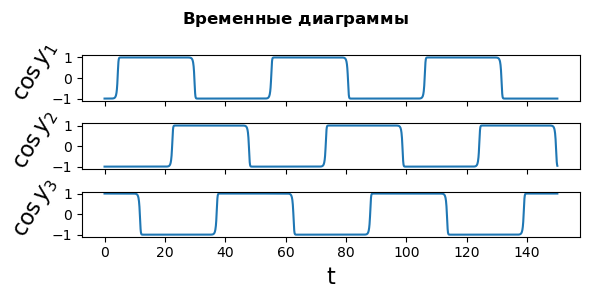

In [40]:
MU.plotTimeSeries(RedSysSol, projFunc = MU.projCos)

In [43]:
RedPeriodTime = PeriodSync_Utils.getPeriodTime(RedSysSol)
ind_tmin = argmin(PeriodSync_Utils.getNorms(RedSysSol))

516

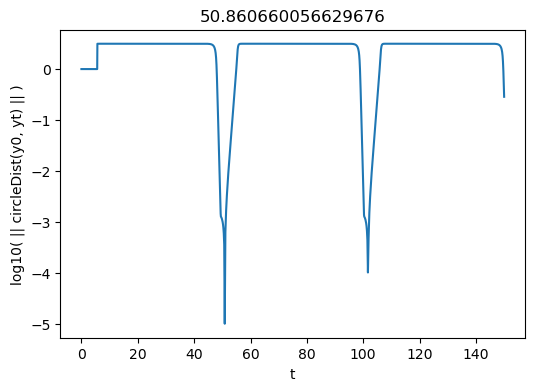

In [42]:
PeriodSync_Utils.plotNorms(RedSysSol)

In [47]:
diffs = [[cos(p) for p in RedSysSol.y[1][1 : ind_tmin]] - [cos(p) for p in RedSysSol.y[1][1 + ind_tmin : 2 * ind_tmin]] for i in 1:3]

3-element Vector{Vector{Float64}}:
 [-1.122238547202059e-6, -3.948285366650595e-6, -1.0583618493154034e-5, -2.4918919528382766e-5, -5.391619214389909e-5, -0.00011118299679935273, -0.00022097034661339165, -0.0004251203573382156, -0.0007935584171088195, -0.0014389464231293614  …  -1.9382442769407944, -1.9553082558070685, -1.9667431213026074, -1.9754924109318215, -1.9833308537959031, -1.9895431148564378, -1.9943945275243644, -1.9969770287708435, -1.9983841656460004, -1.999113104128442]
 [-1.122238547202059e-6, -3.948285366650595e-6, -1.0583618493154034e-5, -2.4918919528382766e-5, -5.391619214389909e-5, -0.00011118299679935273, -0.00022097034661339165, -0.0004251203573382156, -0.0007935584171088195, -0.0014389464231293614  …  -1.9382442769407944, -1.9553082558070685, -1.9667431213026074, -1.9754924109318215, -1.9833308537959031, -1.9895431148564378, -1.9943945275243644, -1.9969770287708435, -1.9983841656460004, -1.999113104128442]
 [-1.122238547202059e-6, -3.948285366650595e-6, -1.05836184

In [55]:

diff = zeros(length(diffs[1]))
for i = 1 : length(diffs[1])
    diff[i] = norm([diffs[1][i], diffs[2][i], diffs[3][i]])
end

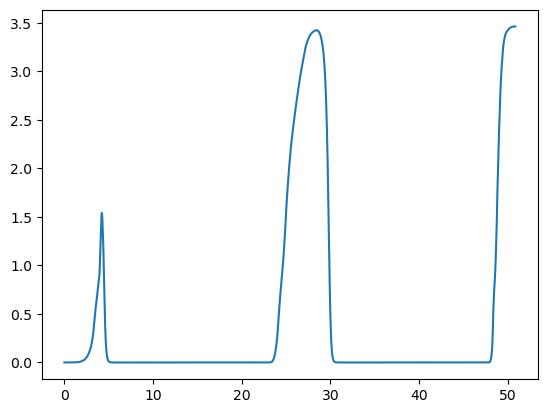

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000001020A51B0>

In [58]:
plot(RedSysSol.t[1 : ind_tmin], diff)

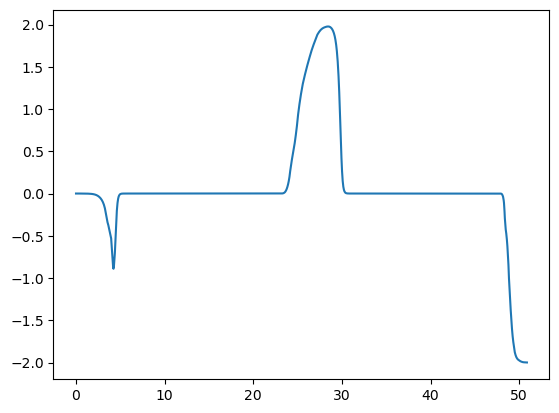

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000FA780FD0>

In [46]:
plot(RedSysSol.t[1 : ind_tmin], [cos(p) for p in RedSysSol.y[1][1 : ind_tmin]] - [cos(p) for p in RedSysSol.y[1][1 + ind_tmin : 2 * ind_tmin]])

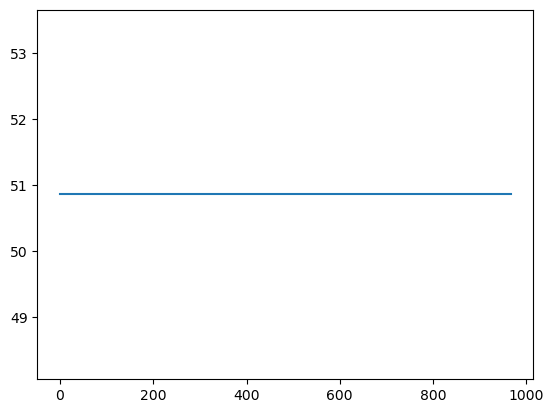

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x000000006E11C2E0>

In [30]:
plot([p + RedPeriodTime for p in RedSysSol.y[1]] - [p for p in RedSysSol.y[1]])

# Интегрируем редуцированную 3D систему совместно с 3D системой в вариациях редуцированной 3D системы

In [21]:
TanSys = BS_Uni_Sys.Get_Tan_Red_Sys_2(config, MyCoupleFunc, syncWith)
#Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 1 0 0 1 0 0; 0 0 1 0 1 0; 0 1 0 0 0 1;]; Q0
Q0 = [1.0, 0.0, 0.0,
        0.0, 1.0, 0.0,
        0.0, 0.0, 1.0,];

In [24]:
x, W = Computation_Utils.SolveTanODE(RedSys, TanSys, u0, Q0, RedPeriodTime; kwargs = ODEKwargs)

([9.426238041046602, 9.424774298218498, -6.283191560556948], [7.28319544366359 6.283195443663587 6.283195443663587; 6.283185339880945 7.283185339880946 6.283185339880945; -6.283185333314986 -6.283185333314986 -5.283185333314986])

In [25]:
eigen(W)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
3-element Vector{Float64}:
 0.9999999999999997
 1.000000000000002
 7.283195450229549
vectors:
3×3 Matrix{Float64}:
 -0.269523  -0.79442   -0.577351
 -0.532709   0.560526  -0.57735
  0.802233   0.233894   0.57735

# Интегрируем редуцированную 3D систему совместно с 6D системой в вариациях полной 6D системы

In [122]:
TanSys = BS_Uni_Sys.Get_Tan_Red_Sys(config, MyCoupleFunc, syncWith)
#Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 1 0 0 1 0 0; 0 0 1 0 1 0; 0 1 0 0 0 1;]; Q0
Q0 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 0.0, 0.0, 0.0,
        1.0, 0.0, 0.0, 1.0, 0.0, 0.0,
        0.0, 0.0, 1.0, 0.0, 1.0, 0.0,
        0.0, 1.0, 0.0, 0.0, 0.0, 1.0];

In [123]:
x, W = Computation_Utils.SolveTanODE(RedSys, TanSys, u0, Q0, periodTime; kwargs = ODEKwargs)

([9.424784367336619, 6.547103767092995, -6.283183217711306], [7.281741769953591 6.281741769953584 … 6.281741769953584 6.281741769953584; 3.4055148087554326 4.405514808755438 … 3.4055148087554326 4.405514808755438; … ; -6.283176990469334 -6.283176990469334 … -5.283176990469333 -6.283176990469334; 3.4055148087554397 3.4055148087554397 … 3.4055148087554397 4.405514808755449])

In [124]:
for i = 1 : 6
    for j = 1 : 6
        print("|| ")
        if W[i, j] > 1e-4
            print(string(sprint(show, W[i, j]; context=:compact => true)), "   ")
        else
            print("    0.0    ")
        end
    end
    println(" ||")
end

|| 7.28174   || 6.28174   || 6.28174   || 7.28174   || 6.28174   || 6.28174    ||
|| 3.40551   || 4.40551   || 3.40551   || 3.40551   || 3.40551   || 4.40551    ||
||     0.0    ||     0.0    ||     0.0    ||     0.0    ||     0.0    ||     0.0     ||
|| 6.28174   || 6.28174   || 6.28174   || 7.28174   || 6.28174   || 6.28174    ||
||     0.0    ||     0.0    ||     0.0    ||     0.0    ||     0.0    ||     0.0     ||
|| 3.40551   || 3.40551   || 3.40551   || 3.40551   || 3.40551   || 4.40551    ||


In [125]:
eigen(W)

Eigen{Float64, Float64, Matrix{Float64}, Vector{Float64}}
values:
6-element Vector{Float64}:
 0.5321501685175656
 0.999999959077159
 1.0000000000000058
 1.0000000000000098
 1.0000000409228218
 8.276009007961854
vectors:
6×6 Matrix{Float64}:
  0.495818  -0.576189    -0.0210088     0.0210088     0.576189    -0.495818
  0.268797  -0.21291     -0.696368      0.696368      0.21291     -0.268797
 -0.495931   0.789098     0.717377     -0.717377     -0.789098     0.495931
 -0.435908   2.35793e-8  -3.00077e-15   3.08603e-15   2.35793e-8  -0.435908
  0.436007  -3.22921e-8   4.27731e-15  -7.16865e-15  -3.22921e-8   0.436007
 -0.236318   8.71287e-9   1.99994e-15   8.04464e-16   8.71286e-9  -0.236318

# Тест на расчет полной 6D системы с ее системой в вариациях

In [17]:
FullTanSys = BS_Uni_Sys.Get_Tan_Full_Sys(config, MyCoupleFunc)
u0 = [p[1] for p in sol.y[1:6]]
#Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 1 0 0 1 0 0; 0 0 1 0 1 0; 0 1 0 0 0 1;]; Q0
Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1;]; Q0

6×6 Matrix{Int64}:
 1  0  0  0  0  0
 0  1  0  0  0  0
 0  0  1  0  0  0
 0  0  0  1  0  0
 0  0  0  0  1  0
 0  0  0  0  0  1

In [31]:
x, W = Computation_Utils.SolveTanODE(ODESystem, FullTanSys, u0, Q0, periodTime; diffeq = diffeq)

LoadError: UndefVarError: FullTanSys not defined

# Тест на расчет полной 6D системы при помощи tangent_integrator...

In [17]:
u0 = [p[1] for p in sol.y[1:6]]
#Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 1 0 0 1 0 0; 0 0 1 0 1 0; 0 1 0 0 0 1;]; Q0
Q0 = [1 0 0 0 0 0; 0 1 0 0 0 0; 0 0 1 0 0 0; 0 0 0 1 0 0; 0 0 0 0 1 0; 0 0 0 0 0 1;]; Q0

6×6 Matrix{Int64}:
 1  0  0  0  0  0
 0  1  0  0  0  0
 0  0  1  0  0  0
 0  0  0  1  0  0
 0  0  0  0  1  0
 0  0  0  0  0  1

In [18]:
CDS = ContinuousDynamicalSystem(ODESystem, u0, [])
tinteg = tangent_integrator(CDS, Q0; diffeq = diffeq)

t: 0.0
u: 6×7 Matrix{Float64}:
 -94.2478   1.0  0.0  0.0  0.0  0.0  0.0
   6.28319  0.0  1.0  0.0  0.0  0.0  0.0
  97.3894   0.0  0.0  1.0  0.0  0.0  0.0
 -94.2478   0.0  0.0  0.0  1.0  0.0  0.0
  97.3894   0.0  0.0  0.0  0.0  1.0  0.0
 -31.4159   0.0  0.0  0.0  0.0  0.0  1.0

In [19]:
step!(tinteg, periodTime)

In [20]:
W = get_deviations(tinteg)

6×6 view(::Matrix{Float64}, :, 2:7) with eltype Float64:
 -21.1369      -1.40108e-10   0.0172315   …  -0.022559    -7.83285e-11
  -5.18409     -3.43632e-11   0.00422624     -0.00553286  -1.9211e-11
   0.00130989   8.68268e-15  -1.06786e-6      1.38194e-6   4.79832e-15
 -24.6065      -1.63106e-10   0.02006        -0.0259749   -9.01893e-11
   0.00101885   6.75353e-15  -8.30599e-7      1.08761e-6   3.77636e-15
   7.1066       4.71067e-11  -0.00579353  …   0.00750182   2.60476e-11

In [26]:
[p % 2*pi for p in get_state(tinteg)]

6-element Vector{Float64}:
 -1.6681244238322772
  4.054946886245414e-6
  5.2544947663006525
 -1.6681224667996428
  5.254494766407264
 -3.5586159655220717

In [21]:
eigen(W)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
6-element Vector{ComplexF64}:
 -3.833377520281089e-19 + 0.0im
 -2.206547105846983e-21 + 0.0im
 1.2280325831228507e-25 + 0.0im
  3.939041392970268e-19 + 0.0im
   0.028459393933153936 - 2.224623373115218im
   0.028459393933153936 + 2.224623373115218im
vectors:
6×6 Matrix{ComplexF64}:
 -2.04037e-9+0.0im  -7.63067e-8+0.0im  …   -0.627926+0.0659992im
         1.0+0.0im    0.0350734+0.0im      -0.154006+0.0161871im
 -2.49467e-6+0.0im  -9.36008e-5+0.0im     3.88584e-5+2.1293e-7im
 9.25857e-10+0.0im   6.86598e-8+0.0im      -0.730015+0.0im
  7.55441e-7+0.0im   5.60255e-5+0.0im     3.02682e-5-3.23839e-6im
  4.63439e-5+0.0im    -0.999385+0.0im  …    0.210836+1.95586e-10im

---